In [1]:
import numpy
import urllib
import scipy.optimize
import random
from math import exp
from math import log
import csv
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
def parseData(fname):
    for l in urllib.urlopen(fname):
        yield eval(l)


In [3]:
print "Reading data..."
dataFile = open("winequality-white.csv")
header = dataFile.readline()
fields = ["constant"] + header.strip().replace('"','').split(';')
featureNames = fields[:-1]
labelName = fields[-1]
lines = [[1.0] + [float(x) for x in l.split(';')] for l in dataFile]
X = [l[:-1] for l in lines]
y = [l[-1]  for l in lines]
print "done"

Reading data...
done


In [5]:
X_train = X[:int(len(X)/3)]
y_train = y[:int(len(y)/3)]
X_test = X[int(2*len(X)/3):]
y_test = y[int(2*len(y)/3):]

In [6]:
X_mean=[]
for i in range(12):
    X_temp =0
    for j in range(len(X_train)):
        X_temp+= X_train[j][i]
    X_mean_temp = X_temp / len(X_train)
    X_mean.append(X_mean_temp)

In [7]:
X_error=[[0] * 12 for row in range(len(X_train))]
for i in range(12):
    for j in range(len(X_train)):
        X_error[j][i] = X_train[j][i] - X_mean[i]
X_error = numpy.matrix(X_error)
reconstruction_error = 0
for j in range(len(X_train)):
    reconstruction_error+= X_error[j]*X_error[j].T
print "Reconstruction Error = ",reconstruction_error

Reconstruction Error =  [[ 3675818.61687812]]


In [8]:
pca = PCA(n_components=11)
pca.fit(X_train)
print pca.components_


[[  0.00000000e+00  -3.23636346e-04   1.42201752e-04   3.17030713e-04
    5.36390435e-02   9.30284526e-05   2.54030965e-01   9.65655009e-01
    3.19990241e-05  -2.95831396e-04   3.84043646e-04  -1.00526693e-02]
 [  0.00000000e+00   7.57985623e-03   1.66366340e-03  -1.04742899e-03
   -5.21677266e-02  -4.49425600e-05  -9.65020304e-01   2.56793964e-01
   -7.90089050e-06  -5.24900596e-04   1.09699394e-03   2.89827657e-03]
 [  0.00000000e+00  -1.82124420e-02  -2.54680710e-03  -3.31838657e-03
   -9.93221259e-01   1.51888372e-04   6.42297821e-02   3.91682592e-02
   -4.30929482e-04   6.93199060e-03   2.85216045e-03   8.62920933e-02]
 [  0.00000000e+00  -1.56811999e-01  -3.28220652e-03  -1.66866136e-02
   -8.28549640e-02   6.91822288e-03  -1.13029682e-03  -5.39110108e-03
    9.49080503e-04  -2.68027305e-03  -1.30498102e-03  -9.83955205e-01]
 [  0.00000000e+00   9.81360642e-01  -1.45890108e-02   5.92643662e-02
   -3.17546064e-02   5.07483182e-04   8.43759364e-03  -1.77578042e-03
    6.03725221e-

In [9]:
reconstruction_error = 0
phi = numpy.matrix(pca.components_)
for j in range(4,11):
    reconstruction_error+= phi[j]*X_error.T*X_error*phi[j].T
print "When 4 dimensional PCA, Reconstruction Error = ",reconstruction_error

When 4 dimensional PCA, Reconstruction Error =  [[ 1345.4755741]]


In [10]:
def feature(X,number):
    pca = PCA(n_components = number)
    pca.fit(X)
    X_trans = pca.transform(X)
    feat = [[1] for row in range(len(X_trans))]
    X_trans = numpy.column_stack((feat, X_trans))
    return X_trans


In [11]:
def msecomp(theta, X, y):
  theta = numpy.matrix(theta).T
  X = numpy.matrix(X)
  y = numpy.matrix(y).T
  diff = X*theta - y
  diffSq = diff.T*diff
  mse = diffSq / len(y)
  return mse.tolist()

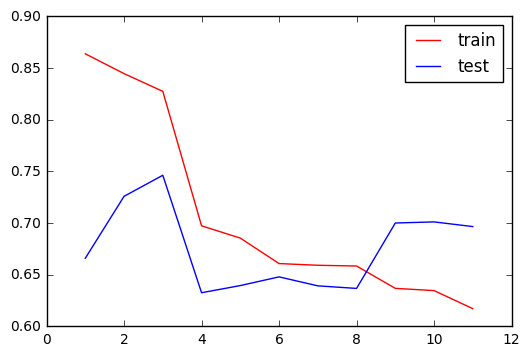

In [12]:
x = []
mse1 = []
mse2 = []
for number in range(1,12):
    x.append(number)
    X1 = feature(X_train, number)
    X2 = feature(X_test, number)
    theta,residuals,rank,s = numpy.linalg.lstsq(X1, y_train)
    mse1.append(msecomp(theta, X1, y_train)[0][0])
    mse2.append(msecomp(theta, X2, y_test)[0][0])
plt.plot(x, mse1, color='red', label = 'train')
plt.plot(x, mse2, color='blue', label = 'test')
plt.legend()
plt.show()